In [10]:
import pandas as pd
import numpy as np
# for consistency, use sc
import scanpy as sc
import anndata
from torch_geometric.data import Data
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
import torch 

In [11]:
cell_annot = pd.read_csv("Paul_cell_meta.txt", sep="\t")
expr = pd.read_csv("Paul_expr.txt", sep="\t")
adata = anndata.AnnData(X=expr.T, obs = cell_annot)
sc.pp.filter_genes(adata, min_counts = 20)
sc.pp.normalize_per_cell(adata)
sc.pp.filter_genes_dispersion(adata, n_top_genes= 512)
sc.pp.log1p(adata)

X_spliced = adata.X
adata.layers['spliced'] = X_spliced
# X_spliced is original, X_pca is after pca
x = X_spliced.copy()
x = StandardScaler().fit_transform(x)
x = torch.FloatTensor(x)
data = Data(x=x)

# How dataset looks like

... storing 'Seq_batch_ID' as categorical
... storing 'Amp_batch_ID' as categorical
... storing 'well_coordinates' as categorical
... storing 'Batch_desc' as categorical
... storing 'Pool_barcode' as categorical
... storing 'Cell_barcode' as categorical
... storing 'RMT_sequence' as categorical
... storing 'cell_type' as categorical
... storing 'cell_type2' as categorical


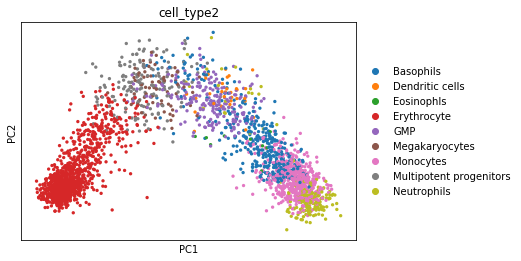

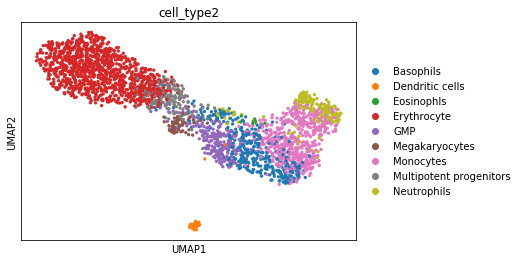

In [12]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10)
sc.tl.umap(adata)
sc.pl.pca(adata, color=["cell_type2"])
sc.pl.umap(adata, color=['cell_type2'])

In [13]:
adata.write_h5ad("Paul_adata.h5ad")
adata = anndata.read_h5ad("Paul_adata.h5ad")

In [14]:
print(adata)

AnnData object with n_obs × n_vars = 2699 × 512 
    obs: 'Seq_batch_ID', 'Amp_batch_ID', 'well_coordinates', 'Mouse_ID', 'Plate_ID', 'Batch_desc', 'Pool_barcode', 'Cell_barcode', 'RMT_sequence', 'Number_of_cells', 'CD34_measurement', 'FcgR3_measurement', 'cluster', 'Size_Factor', 'cell_type', 'Pseudotime', 'State', 'cell_type2', 'ery_meg_lineage_score', 'cell_stemness_score', 'no_expression', 'n_counts'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm'
    uns: 'cell_type2_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced'
